In [43]:
import numpy as np
from scipy.sparse import spdiags
from scipy.integrate import solve_ivp
from scipy.sparse.linalg import spsolve
import numpy.matlib
import matplotlib.pylab as plt
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

## spdiags

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spdiags.html

In [2]:
n = 5
b = np.ones((n))
Bin = np.array([-b, 2*b, -b])
d = np.array([-1,0,1])
M = spdiags(Bin,d,n,n)

In [3]:
M

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements (3 diagonals) in DIAgonal format>

In [4]:
Bin = np.matlib.repmat(np.arange(1,7),7,1).T
d = np.array([-4, -2, -1, 0, 3, 4])

np.matlib.repmat(np.array([[1],[2],[3]]),5,2)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3]])

In [5]:
spdiags(Bin,d,6,6).toarray()

array([[4, 0, 0, 5, 6, 0],
       [3, 4, 0, 0, 5, 6],
       [2, 3, 4, 0, 0, 5],
       [0, 2, 3, 4, 0, 0],
       [1, 0, 2, 3, 4, 0],
       [0, 1, 0, 2, 3, 4]])

In [6]:
spdiags(Bin,d,6,6).todense()

matrix([[4, 0, 0, 5, 6, 0],
        [3, 4, 0, 0, 5, 6],
        [2, 3, 4, 0, 0, 5],
        [0, 2, 3, 4, 0, 0],
        [1, 0, 2, 3, 4, 0],
        [0, 1, 0, 2, 3, 4]])

In [7]:
m=5 # N value in x and y directions 
n=m*m # total size of matrix
e0=np.zeros((n)) # vector of zeros 
e1=np.ones((n)) # vector of ones
e2=e1.copy() # copy the one vector 
e4=e0.copy() # copy the zero vector 
for j in range(m):
    e2[m*j-1]=0 # overwrite every m^th value with zero
    e4[m*j-1]=1 # overwirte every m^th value with one 
e3 = np.zeros((n))
e3[1:n+1]=e2[0:n-1]
# shift to correct positions
e3[0]=e2[n-1] 
e5 = np.zeros((n))
e5[1:n-1]=e4[0:n-2]
e5[0]=e4[n-1]
# place diagonal elements

Bin=np.array([e1, e1, e5, e2, -4*e1, e3, e4, e1, e1])
d=np.array([-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)])
matA=spdiags(Bin, d,n,n)

In [8]:
print(matA.toarray()[0:9,0:9])

[[-4.  1.  0.  0.  1.  1.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  0.  1.]
 [ 1.  0.  0.  1. -4.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  1. -4.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  1. -4.]]


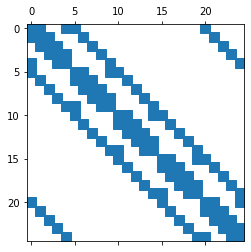

In [9]:
plt.spy(matA)

In [10]:
#alternatively
n=25
e1 = np.ones((n)).T # vector of ones
Low1 = np.matlib.repmat(np.concatenate((np.ones((m-1)), np.array([0]))), 1,m).reshape(n)
Low2 = np.matlib.repmat(np.concatenate((np.array([1]),np.zeros((m-1)))), 1,m).reshape(n)
Up1 = np.roll(Low1, 1) # Shift the array
Up2 = np.roll(Low2, m-1) # Shift the other array
Bin = np.array([e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1])
d = np.array([-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)])
A = spdiags(Bin,d, n, n)
    

In [11]:
print(A.toarray()[0:9,0:9])

[[-4.  1.  0.  0.  1.  1.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  0.  1.]
 [ 1.  0.  0.  1. -4.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  1. -4.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  1. -4.]]


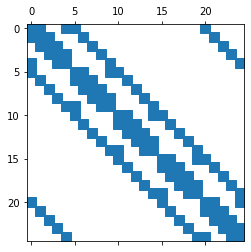

In [12]:
plt.spy(A)

In [13]:
b = np.ones(n)
ans = spsolve(matA,b)

## Solving the Heat Equation

$u_t=100u_{xx}, u(x,0) = f(x)$

$|u|\rightarrow 0 \text{ as }|x|\rightarrow \infty$

with periodic boundary conditions and big L.

In [44]:
f = lambda x: np.exp(-(x-2)**2) #Define the Initial Condition
L = 5 #Define the length, L
term = 5 #Solve up until time t = T. 
x = np.arange(-L,L,0.1) #Our x domain.
N = len(x)

In [45]:
#Create the matrix A = d^2/dx^2 using "diag". 
#We will see sparse diag below.
D = -2*np.ones((N)) #on the diagonal
Up = np.ones((N-1)) #On the first upper diagonal
Down = np.ones((N-1)) #On the first lower diagonal

A = np.diag(D) + np.diag(Up, 1) + np.diag(Down, -1) # Add matrices, to get tridiagonal
A[0,-1] = 1 
A[-1, 0] = 1 # Add in the periodic boundary conditions

A = 100*A # Because the PDE is 100*u_{xx}

y0 = f(x) # Initial condition evaluated on our domain x. 


0.20741033554077148


<IPython.core.display.Javascript object>


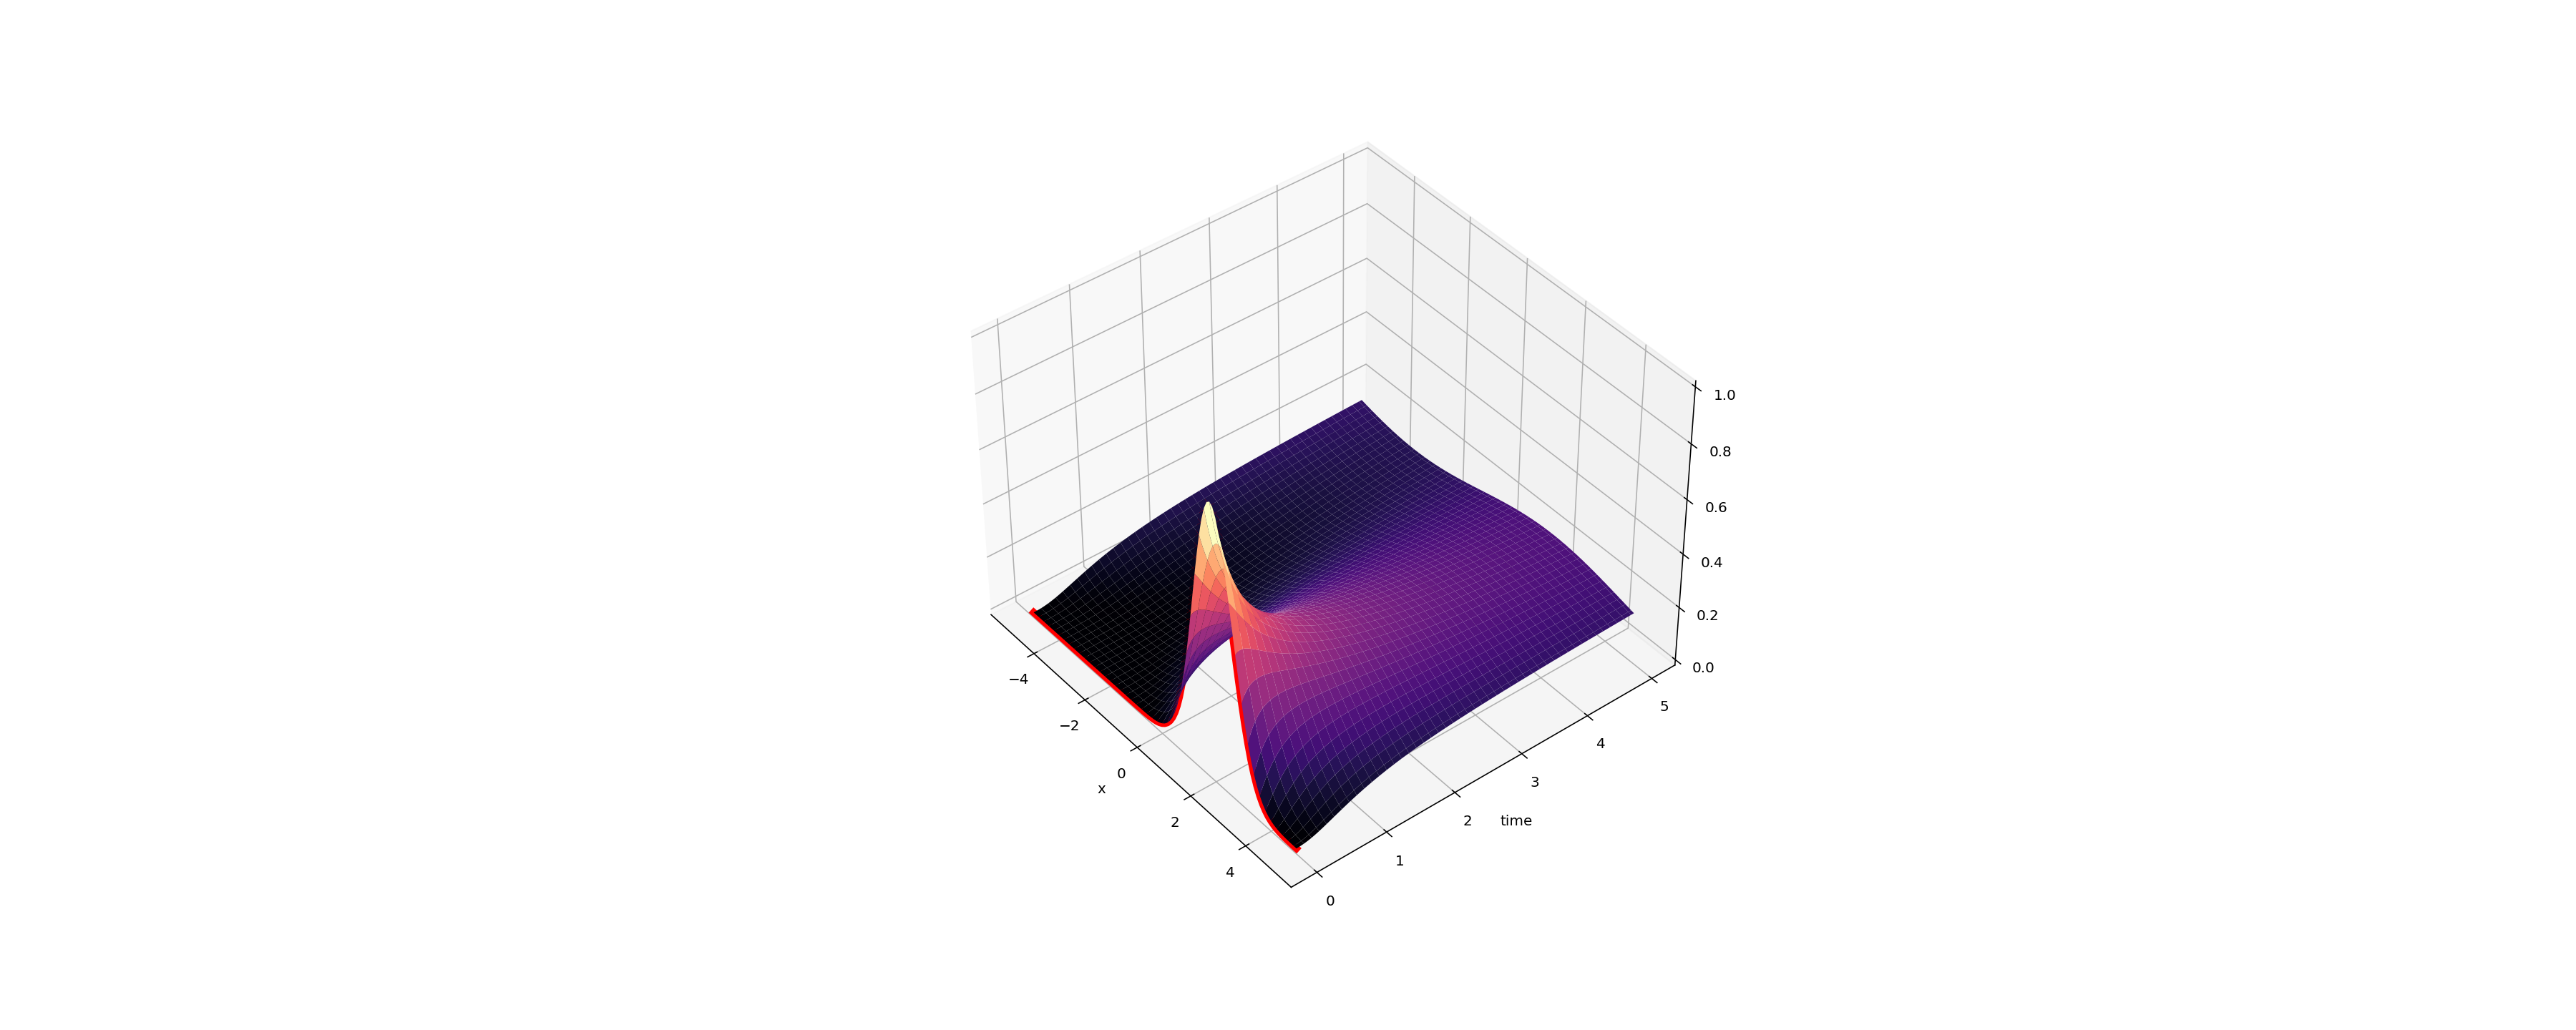

In [46]:
def heatPDE(t, x, A):
    u_t = A@x # u_t = 100 u_{xx}
    return u_t

tic = time.time()
sol = solve_ivp(lambda t,x: heatPDE(t, x, A),[0, term],y0)
toc = time.time()

print(toc-tic)

# Create surface plot
X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(25, 10))
surf = ax.plot_surface(X, T, sol.y.T,cmap='magma')
ax.plot3D(x, 0*x, f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

## Solving the Wave Equation

$u_{tt}=u_{xx}, u(x,0) = f(x), u_t(x,0) = 0$

$|u|\rightarrow 0$ as $|x|\rightarrow \infty$, use $-L \leq x \leq L$ periodic with $L$ large enough.

In [47]:
def wavePDE(t, x, A):
    # In this function x = [u; u_t]. The first N rows of the column vector
    # are the values of u and the next N rows of the column vector are the
    # values of u_t. We stack them.
    
    N = int(len(x)/2); # The length of our computational domain.
    u_t = np.array([x[N :], 100*A@x[0:N]]).reshape(-1, 1) # If we rewrite u_{tt} = A u, this
                                        # is the system of ODEs we get.
    u_t = u_t.flatten()
    return u_t



In [66]:
f = lambda x: np.exp(-(x**2)) # Gaussian Initial Condition
g = lambda x: np.zeros((len(x))) #Zero initial condition
L = 5 # First do L = 15, then do L = 5 to show affect of periodic BCs
term = 10 
x = np.arange(-L,L,0.1)
N = len(x)

In [67]:
#Create the same matrix A as above, but sparse
e = np.ones((N))
Bin = np.array([e, e, -2*e, e, e])
d = np.array([-N+1, -1, 0, 1, N-1])
A = spdiags(Bin, d, N, N)

In [33]:
np.shape(A)

(300, 300)

In [68]:
y0 = np.array([f(x),g(x)]).reshape(-1,1) # Initial condition for u and for u_t 
                            # (second-order ODE in t)
y0 = y0.flatten()

In [69]:
tic = time.time()
sol = solve_ivp(lambda t,x: wavePDE(t, x, A),[0, term],y0) #Solve
toc = time.time()

print(toc-tic)

y_sol = sol.y[0:N,:].T # Solution, u, is the first N elements of the solution
                   # array. The next N are u_t. 


0.11965179443359375


In [70]:
X, T = np.meshgrid(x,sol.t)


<IPython.core.display.Javascript object>


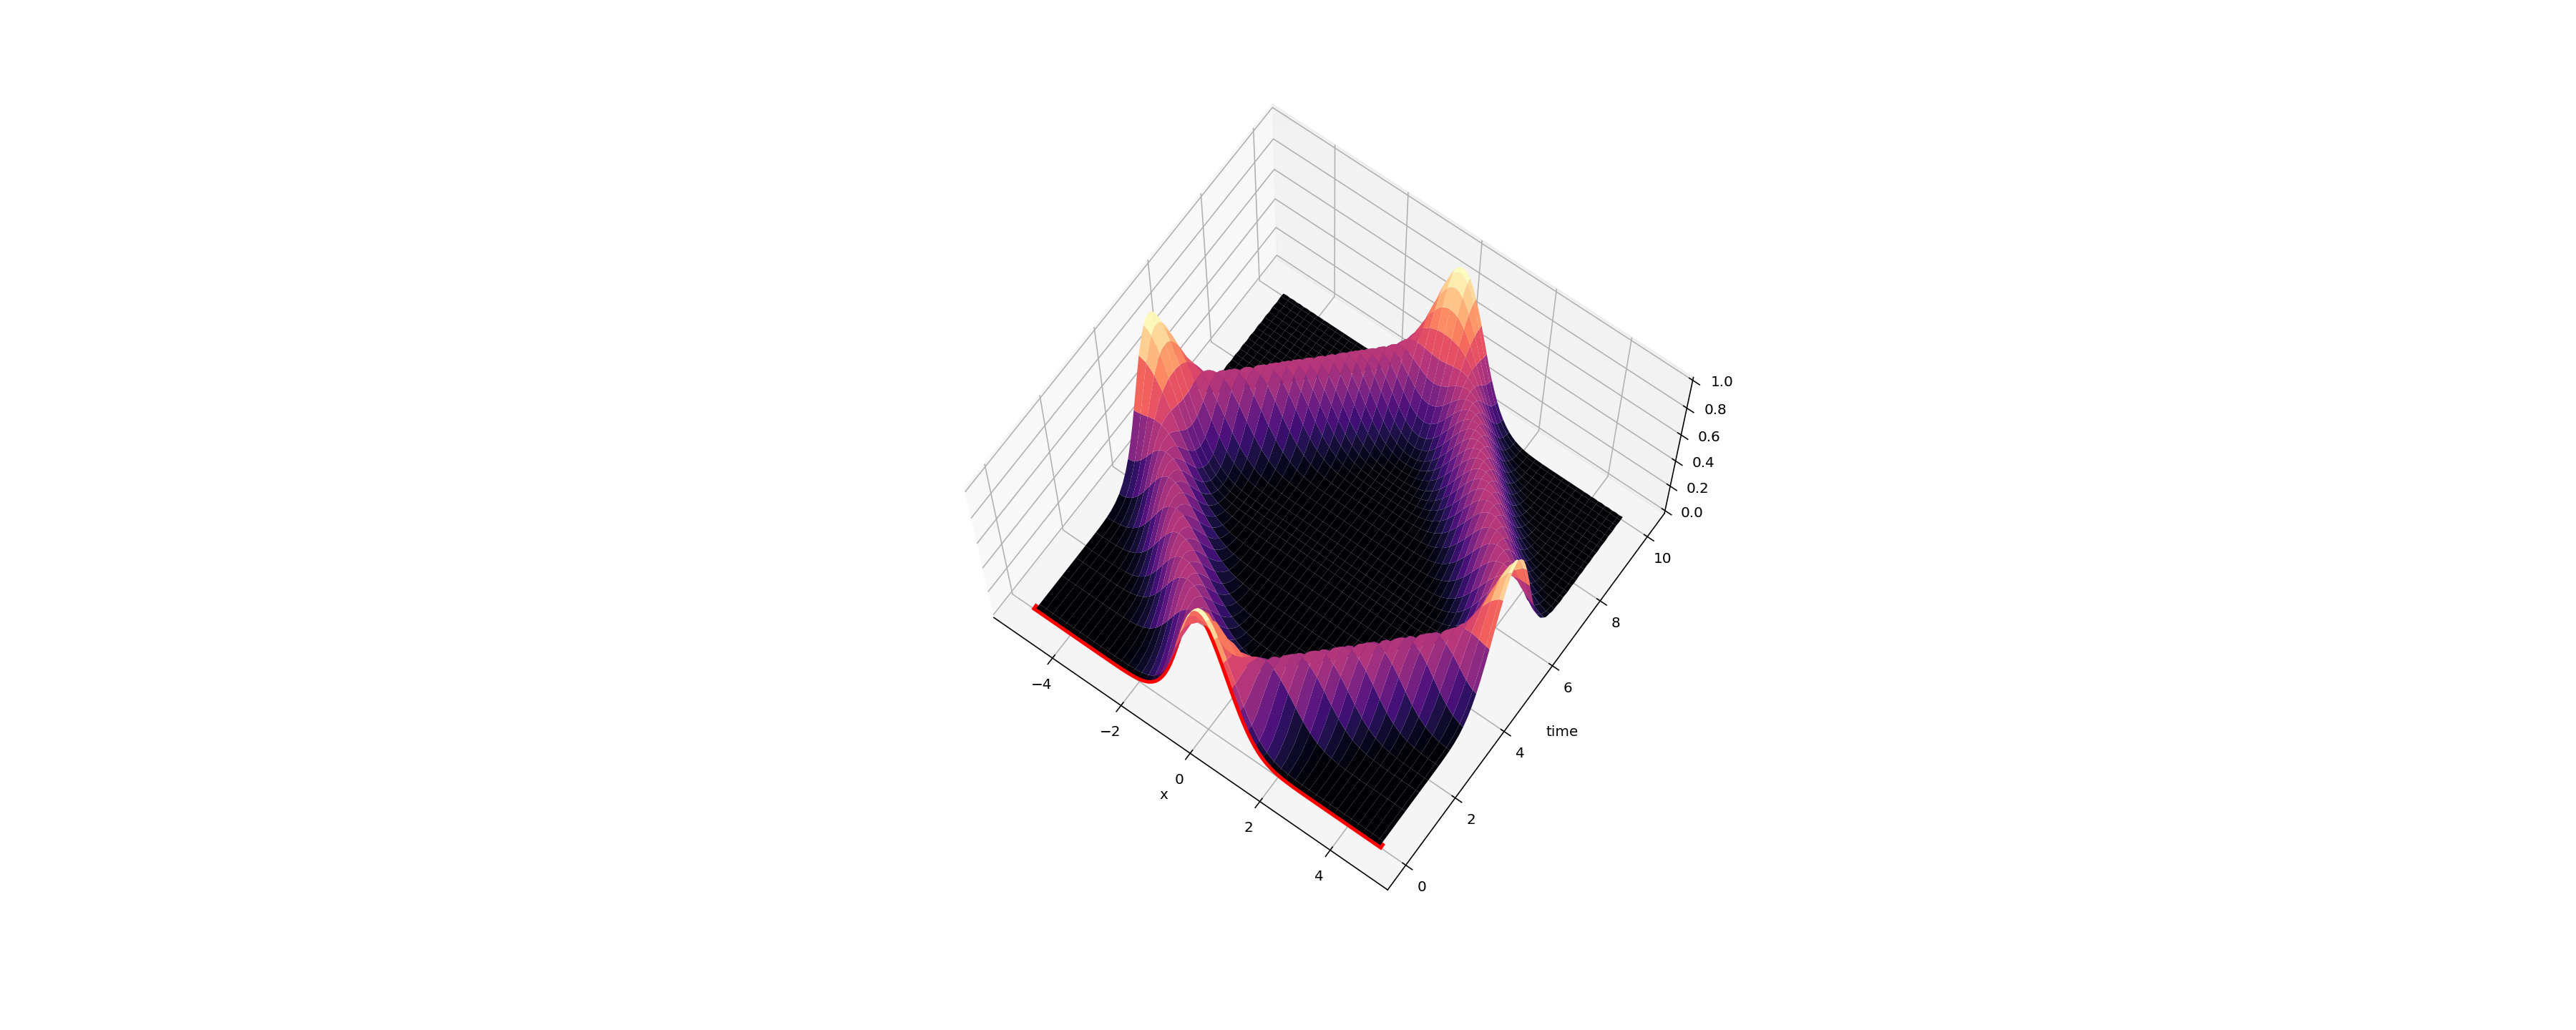

In [71]:
# Create surface plot
X, T = np.meshgrid(x,sol.t)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(25, 10))
surf = ax.plot_surface(X, T, y_sol,cmap='magma')
ax.plot3D(x, 0*x, f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

## Introducing FFT

In [ ]:
from scipy.fft import fft, ifft, fftshift

In [ ]:
L = 20 # define the computational domain [-L/2,L/2]
n = 128 # define the number of Fourier modes 2^n

x2 = np.linspace(-L/2,L/2,n+1) # define the domain discretization
x = x2[0:n] # consider only the first n points: periodicity
#(first and last points are the same)

u = np.exp(-x*x) #function to take the fft of

ut = fft(u) #FFT the function

utshift = fftshift(ut) #shift FFT

#mention k space shift
plt.figure()
plt.plot(x,u) #plot initial gaussian
plt.figure()
plt.plot(abs(ut)) # plot unshifted transform
plt.figure()
plt.plot(abs(utshift)) # plot shifted transform

### Taking Derivatives with FFT

In [ ]:
L = 20 # define the computational domain [-L/2,L/2]
n = 128 # define the number of Fourier modes 2^n

x2 = np.linspace(-L/2,L/2,n+1) # define the domain discretization
x = x2[0:n]# consider only the first n points: periodicity

u = 1/np.cosh(x) #function to take the derivative of 
ut = fft(u) # FFT of the function

k = (2*np.pi/L)*np.concatenate((np.arange(0,(n/2)),np.arange((-n/2),0))) # k rescaled to 2pi domain
# we don't have to do fft here, we just need to remember that everything is
# rotated
# to get the derivative multiply ut by i*k, repeat for more 
ut1 = 1j*k*ut # first derivative
ut2 = -k*k*ut # second derivative
ut3 = -1j*k*k*k*ut # third derivative


u1 = ifft(ut1) #inverse transform
u2 = ifft(ut2) #inverse transform
u3 = ifft(ut3) #inverse transform

u1exact = -(1/np.cosh(x))*np.tanh(x) #analytic first derivative

plt.plot(x,u,'r')
plt.plot(x,u1,'g')
plt.plot(x,u1exact,'go')
plt.plot(x,u2,'b')
plt.plot(x,u3,'c')
plt.legend(['funcition','d1 approx','d1 true','d2 approx','d3 approx'])

# if not smooth, increase points but remember powers of 2 so 256